# Loan Eligibility Prediction

**Goal:** automate the process of determining an individual's loan eligibility based on their bank account information. In this project,first preprocess the data, then train various models, and finally, evaluate their performance

## Part 1: Data Preprocessing
- Handle Missing Values
- Encoding Non-numeric Variables
- Splitting Data For Training and Evaluation
- Normalization Of Numeric Data

#### Import Libraries
- Pandas for Reading CSV file
- Matplotlib & Seaborn for visualization
- train_test_split for splitting data for training and testing
- StandardScaler for Normalization

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Packages
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#### Load Dataset

In [ ]:
# Load Dataset
data_path = "../data/input/loan.csv"
dataframe = pd.read_csv(data_path)
# Extract information and columns label
print("Shape:", dataframe.shape)
print("Columns:", list(dataframe.columns))
display(dataframe.head())
display(dataframe.info())

Shape: (614, 12)
Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


None

**Find null values**

In [34]:
dataframe.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Fill Missing Values
**Method:** Utilize KNN Imputation for handeling missing values

In [35]:
from sklearn.impute import KNNImputer

#Convert Categorical to Numerical
label_encoder = LabelEncoder()
dataframe['Gender'] = label_encoder.fit_transform(dataframe['Gender'].astype(str))
dataframe['Married'] = label_encoder.fit_transform(dataframe['Married'].astype(str))
dataframe['Education'] = label_encoder.fit_transform(dataframe['Education'].astype(str))
dataframe['Self_Employed'] = label_encoder.fit_transform(dataframe['Self_Employed'].astype(str))
dataframe['Property_Area'] = label_encoder.fit_transform(dataframe['Property_Area'].astype(str))

# Fill nan values in 'Dependents' column
dataframe['Dependents'] = dataframe['Dependents'].fillna(value=0)
dataframe['Dependents'] = dataframe['Dependents'].replace('3+',4).astype('int')

# Use KNN Imputer
imputer = KNNImputer(n_neighbors=5)
dataframe[['Gender','Married','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']] = imputer.fit_transform(
    dataframe[['Gender','Married','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']]
)

- Check Dataframe Again to be sure about filling missing values

In [36]:
display(dataframe.head(10))
display(dataframe.isnull().sum())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0,0.0,5849,0.0,160.8,360.0,1.0,2,Y
1,1.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,1.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,Y
5,1.0,1.0,2,0,1.0,5417,4196.0,267.0,360.0,1.0,2,Y
6,1.0,1.0,0,1,0.0,2333,1516.0,95.0,360.0,1.0,2,Y
7,1.0,1.0,4,0,0.0,3036,2504.0,158.0,360.0,0.0,1,N
8,1.0,1.0,2,0,0.0,4006,1526.0,168.0,360.0,1.0,2,Y
9,1.0,1.0,1,0,0.0,12841,10968.0,349.0,360.0,1.0,1,N


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Split Data for Training, Testing, Validation
training (65%), validation (20%), and test (15%)

In [37]:
X = dataframe.drop(['Loan_Status'], axis=1)
y = dataframe['Loan_Status']

# Split the data into training and temp (combined validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35, random_state=42)
# Split the temp set into validation (20% of the total data) and test (15% of the total data)
# test size >> 20% / (20% + 15%) = 57.14% validation set, so 42.86% is test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4286, random_state=42)

#### Normalize the data

In [38]:
scaler = StandardScaler()

# fit the scaler on train data
X_train_scaled = scaler.fit_transform(X_train)

# fit the scaler on test and validation data
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_train = pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
540,0.0,1.0,1,0,0.0,4608,2845.0,140.0,180.0,1.0,1
298,0.0,0.0,0,0,0.0,5000,2541.0,151.0,480.0,1.0,0
149,1.0,1.0,0,0,0.0,4860,830.0,125.0,360.0,1.0,1
124,1.0,1.0,0,1,0.0,4300,2014.0,194.0,360.0,1.0,0
442,1.0,0.0,4,1,0.0,4707,1993.0,148.0,360.0,1.0,1


## Part 2: Model Training
Train the following machine learning models on the preprocessed data from Part 1. By tuning hyperparameters, then attempt to find the best possible performance for each model. Report the performance of each model on the validation set (which you created in the previous part) using the evaluation metrics

- Logistic Regression
- K-Nearest Neighbors - KNN
- K-Nearest Neighbors - ANN

#### Import Scikit-Learn models

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:
# Choose models
models = [LogisticRegression(max_iter=5000, solver='saga', random_state=42),
          KNeighborsClassifier(),
          MLPClassifier(random_state=42)]

# Function to comparison model's accuracy between with normalization and without normalization
# Without Normalization
def model_selection():
    for model in models:
        model.fit(X_train, y_train)
        predict = model.predict(X_val)
        accuracy = accuracy_score(y_val, predict)
        c_report = classification_report(y_val, predict, zero_division=1)
        print(f"{model}\naccuracy:", accuracy)
        print(f"\nclassification report:\n", c_report)

#With Normalization
def model_scaler_selection():
    for model in models:
        model.fit(X_train_scaled, y_train)
        predict = model.predict(X_val_scaled)
        accuracy = accuracy_score(y_val, predict)
        c_report = classification_report(y_val, predict, zero_division=1)
        print(f"{model}\naccuracy:", accuracy)
        print(f"\nclassification report:\n", c_report)

- Without Normalization Result

In [41]:
model_selection()

LogisticRegression(max_iter=5000, random_state=42, solver='saga')
accuracy: 0.639344262295082

classification report:
               precision    recall  f1-score   support

           N       1.00      0.00      0.00        44
           Y       0.64      1.00      0.78        78

    accuracy                           0.64       122
   macro avg       0.82      0.50      0.39       122
weighted avg       0.77      0.64      0.50       122

KNeighborsClassifier()
accuracy: 0.5409836065573771

classification report:
               precision    recall  f1-score   support

           N       0.20      0.09      0.12        44
           Y       0.61      0.79      0.69        78

    accuracy                           0.54       122
   macro avg       0.40      0.44      0.41       122
weighted avg       0.46      0.54      0.49       122

MLPClassifier(random_state=42)
accuracy: 0.4672131147540984

classification report:
               precision    recall  f1-score   support

          

- With Normalization

In [42]:
model_scaler_selection()

LogisticRegression(max_iter=5000, random_state=42, solver='saga')
accuracy: 0.8032786885245902

classification report:
               precision    recall  f1-score   support

           N       0.95      0.48      0.64        44
           Y       0.77      0.99      0.87        78

    accuracy                           0.80       122
   macro avg       0.86      0.73      0.75       122
weighted avg       0.84      0.80      0.78       122

KNeighborsClassifier()
accuracy: 0.7950819672131147

classification report:
               precision    recall  f1-score   support

           N       0.91      0.48      0.63        44
           Y       0.77      0.97      0.86        78

    accuracy                           0.80       122
   macro avg       0.84      0.73      0.74       122
weighted avg       0.82      0.80      0.78       122

MLPClassifier(random_state=42)
accuracy: 0.7786885245901639

classification report:
               precision    recall  f1-score   support

         

c:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Part 3: Model Comparison
evaluate the performance of the trained models from Part 2 on the test set

In [43]:
# Without Normalization
def test_model_selection():
    for model in models:
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        accuracy = accuracy_score(y_test, predict)
        c_report = classification_report(y_test, predict, zero_division=1)
        print(f"{model} accuracy:", accuracy)
        print(f"{model} classification report:", c_report)

#With Normalization
def test_model_scaler_selection():
    for model in models:
        model.fit(X_train_scaled, y_train)
        predict = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, predict)
        c_report = classification_report(y_test, predict, zero_division=1)
        print(f"{model} accuracy:", accuracy)
        print(f"{model} classification report:", c_report)

- Without Normalization (test set)

In [44]:
test_model_selection()

LogisticRegression(max_iter=5000, random_state=42, solver='saga') accuracy: 0.6451612903225806
LogisticRegression(max_iter=5000, random_state=42, solver='saga') classification report:               precision    recall  f1-score   support

           N       1.00      0.00      0.00        33
           Y       0.65      1.00      0.78        60

    accuracy                           0.65        93
   macro avg       0.82      0.50      0.39        93
weighted avg       0.77      0.65      0.51        93

KNeighborsClassifier() accuracy: 0.6021505376344086
KNeighborsClassifier() classification report:               precision    recall  f1-score   support

           N       0.38      0.18      0.24        33
           Y       0.65      0.83      0.73        60

    accuracy                           0.60        93
   macro avg       0.51      0.51      0.49        93
weighted avg       0.55      0.60      0.56        93

MLPClassifier(random_state=42) accuracy: 0.4731182795698925
MLPC

- With Normalization (test set)

In [45]:
test_model_scaler_selection()

LogisticRegression(max_iter=5000, random_state=42, solver='saga') accuracy: 0.7849462365591398
LogisticRegression(max_iter=5000, random_state=42, solver='saga') classification report:               precision    recall  f1-score   support

           N       0.93      0.42      0.58        33
           Y       0.76      0.98      0.86        60

    accuracy                           0.78        93
   macro avg       0.84      0.70      0.72        93
weighted avg       0.82      0.78      0.76        93

KNeighborsClassifier() accuracy: 0.7741935483870968
KNeighborsClassifier() classification report:               precision    recall  f1-score   support

           N       0.88      0.42      0.57        33
           Y       0.75      0.97      0.85        60

    accuracy                           0.77        93
   macro avg       0.81      0.70      0.71        93
weighted avg       0.80      0.77      0.75        93

MLPClassifier(random_state=42) accuracy: 0.7526881720430108
MLPC

c:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Visualize The Comparison Between Models
compare  LogisticRegression, KNN, and ANN with and without Normalization on (validation set)

c:\Users\moham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


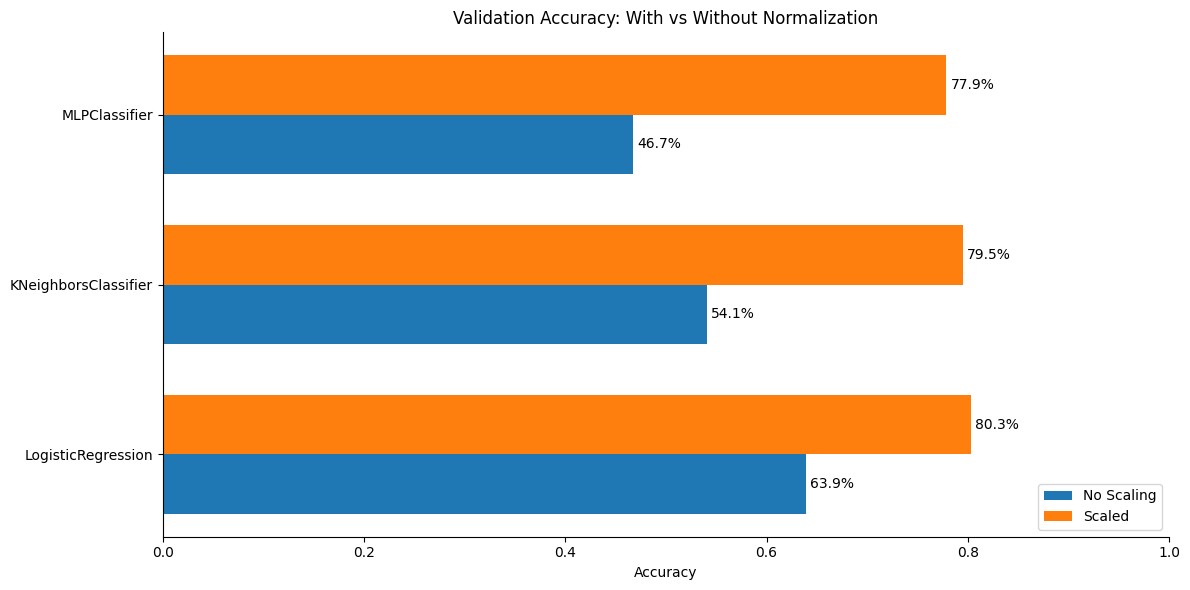

In [46]:
from sklearn.base import clone
# model names for y-axis
model_names = [m.__class__.__name__ for m in models]

# collect accuracies (no scaling vs scaled)
val_acc_ns, val_acc_sc = [], []

for m in models:
    mm = clone(m)
    mm.fit(X_train, y_train)
    val_acc_ns.append(accuracy_score(y_val, mm.predict(X_val)))

for m in models:
    mm = clone(m)
    mm.fit(X_train_scaled, y_train)
    val_acc_sc.append(accuracy_score(y_val, mm.predict(X_val_scaled)))

# horizontal grouped bar chart
y = np.arange(len(model_names))
h = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars_ns = ax.barh(y - h/2, val_acc_ns, h, label="No Scaling")
bars_sc = ax.barh(y + h/2, val_acc_sc, h, label="Scaled")


ax.set(
    xlabel="Accuracy",
    yticks=y,
    yticklabels=model_names,
    xlim=(0, 1),
    title="Validation Accuracy: With vs Without Normalization",
)
ax.legend(loc="lower right")
ax.spines[['top','right']].set_visible(False)
# labels on bars (percent)
try:
    ax.bar_label(bars_ns, labels=[f"{v:.1%}" for v in val_acc_ns], padding=3)
    ax.bar_label(bars_sc, labels=[f"{v:.1%}" for v in val_acc_sc], padding=3)
except AttributeError:  # fallback for older Matplotlib
    for b, v in zip(bars_ns, val_acc_ns):
        ax.text(b.get_width() + 0.01, b.get_y() + b.get_height()/2, f"{v:.1%}", va="center")
    for b, v in zip(bars_sc, val_acc_sc):
        ax.text(b.get_width() + 0.01, b.get_y() + b.get_height()/2, f"{v:.1%}", va="center")

fig.tight_layout()
plt.show()

**Conclusion**
- Normalization dramatically boosts validation accuracy for all three models.
- Without scaling: LogisticRegression 63.9%, KNN 54.1%, MLP 46.7.
- With scaling: \~80% across the board (80.3, 79.5, 77.9).
- Conclusion: feature scaling is essential—especially for distance-based (KNN) and gradient-based (MLP) models—and should be built into the preprocessing pipeline.


## Part 4: Exploration and Improvement (Bonus)
Utilize GridsearchCV to get more accuracy

**Models that are choosed:**
- LogisticRegression
- DecisionTreeClassifier
- GradientBoostingClassifier
- RandomForestClassifier

#### LogisticRegression

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for hyperparameter tuning
param = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV for Logistic Regression
grid_log = GridSearchCV(estimator=LogisticRegression(),
                        param_grid=param,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=5)

# Fit the model using the correct training data (X_train_scaled and y_train)
grid_log.fit(X_train_scaled, y_train)

# Print best parameters and best score from the grid search
print("Best parameters:", grid_log.best_params_)
print("Best cross-validation score:", grid_log.best_score_)

Best parameters: {'C': 0.1, 'solver': 'saga'}
Best cross-validation score: 0.8119620253164557


In [48]:
print (grid_log.best_score_)
print (grid_log.best_params_)
print(grid_log.best_estimator_)

0.8119620253164557
{'C': 0.1, 'solver': 'saga'}
LogisticRegression(C=0.1, solver='saga')


In [49]:
log_accuracy_grid = grid_log.best_score_.round(3)
log_accuracy_grid 

np.float64(0.812)

#### DecisionTreeClassifier

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

cv = StratifiedShuffleSplit(n_splits = 3, test_size = .30, random_state=42)

grid_dec = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_dec.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=42, test_size=0.3,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [10, 20, 50, 100, 120]},
             scoring='accuracy', verbose=1)

In [51]:
print (grid_dec.best_score_)
print (grid_dec.best_params_)
print(grid_dec.best_estimator_)

0.8083333333333332
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20)


In [52]:
decision_accuracy_grid = grid_dec.best_score_.round(3)
decision_accuracy_grid

np.float64(0.808)

#### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'learning_rate': [0.01,0.025, 0.05,0.075, 0.1], 'n_estimators': [130,140,150], 'max_depth': [1,2,3]}
grid_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid,scoring='accuracy',verbose=0, cv= StratifiedShuffleSplit(n_splits=4, test_size=.30, random_state=15), n_jobs=-1)
grid_gbc.fit(X_train_scaled, y_train)

In [ ]:
print (grid_gbc.best_score_)
print (grid_gbc.best_params_)
print (grid_gbc.best_estimator_)

0.8333333333333334
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 140}
GradientBoostingClassifier(max_depth=1, n_estimators=140, random_state=42)


In [ ]:
gbc_accuracy_grid = grid_gbc.best_score_.round(3)
gbc_accuracy_grid

np.float64(0.833)

#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(random_state=42)
r_param = {
    'n_estimators': [10,50,100,500,1000],
    'max_depth': [1,2,5,7,9,10]
}
grid_rf = GridSearchCV(rand_forest, r_param,cv = 10,)
grid_rf.fit(X_train_scaled,y_train)

KeyboardInterrupt: 

In [ ]:
print (grid_rf.best_score_)
print (grid_rf.best_params_)
print (grid_rf.best_estimator_)

0.8170512820512821
{'max_depth': 2, 'n_estimators': 50}
RandomForestClassifier(max_depth=2, n_estimators=50, random_state=42)


In [ ]:
rf_accuracy_grid = grid_rf.best_score_.round(3)
rf_accuracy_grid

np.float64(0.817)

#### Creaate a table to sort models based on accuracy

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Decision Tree','GradientBoostingClassifier','RandomForestClassifier'],
        
    'Accuracy': [
        log_accuracy_grid, decision_accuracy_grid,gbc_accuracy_grid,rf_accuracy_grid]
})

In [ ]:
# Set the display precision
pd.set_option('display.float_format', '{:.3f}'.format)

# Correct the typo and properly chain the styling methods
styled_models = models.sort_values(by='Accuracy', ascending=False)

# Display the styled DataFrame
styled_models

,Model,Accuracy
2,GradientBoostingClassifier,0.833
3,RandomForestClassifier,0.817
0,Logistic Regression,0.812
1,Decision Tree,0.808


#### Visualize And Compare Models With Horizental barplot

C:\Users\moham\AppData\Local\Temp\ipykernel_24912\1390543697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=styled_models, palette=colors)


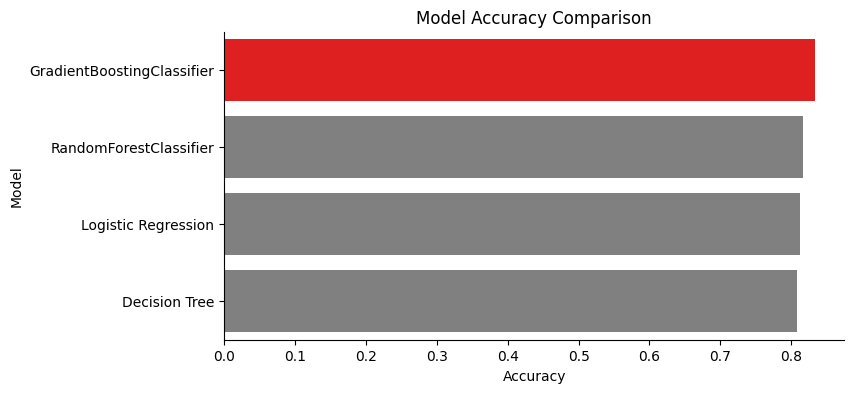

In [ ]:
colors = colors = ['red' if acc == styled_models['Accuracy'].max() else 'gray' for acc in styled_models['Accuracy']]
fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(x='Accuracy', y='Model', data=styled_models, palette=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
ax.spines[['top','right']].set_visible(False)
plt.show()